<a href="https://colab.research.google.com/github/ganbagal/GEN_AI_Assignments/blob/main/GEN_AI_Assignments_Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a Python program to draw a 3D plot
that visualizes the regression model for
house price prediction using suitable
Python-based 3D plotting libraries.

Assume the following features were used:

•	Area (sq ft)

•	Number of Bedrooms

•	House Price


In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [2]:
# Create Sample Dataset

data = {

        'Area': [800,1000,1200,1500,1800,2000],
        "BedRooms":[1,2,2,3,3,4],
        "Price":[3000000,4500000,5000000,6500000,7500000,9000000]
}

df = pd.DataFrame(data)
df

,Area,BedRooms,Price
0,800,1,3000000
1,1000,2,4500000
2,1200,2,5000000
3,1500,3,6500000
4,1800,3,7500000
5,2000,4,9000000


In [3]:
from re import X
# Seperate features and targets

X = df[['Area','BedRooms']]
y = df['Price']

In [4]:
# Train the regression mode

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [8]:
# Create Mesh Grid for 3D Surface

area_range = np.linspace(df['Area'].min(),df['Area'].max(),20)
bedroom_range = np.linspace(df['BedRooms'].min(),df['BedRooms'].max(),20)

area_grid, bedroom_grid = np.meshgrid(area_range,bedroom_range)

price_pred = model.predict(np.c_[area_grid.ravel(),bedroom_grid.ravel()])
price_grid = price_pred.reshape(area_grid.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


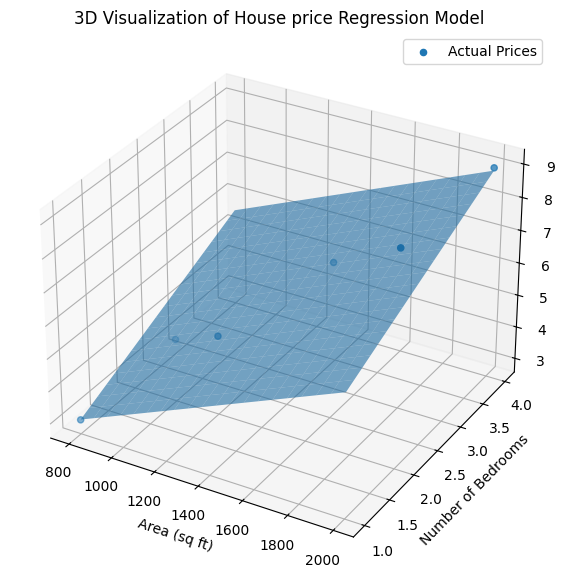

In [9]:
# Plot 3D regression model :

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(df['Area'],df['BedRooms'],df['Price'],label="Actual Prices")

ax.plot_surface(area_grid,bedroom_grid,price_grid,alpha=0.6)

ax.set_xlabel('Area (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('House Price')
ax.set_title("3D Visualization of House price Regression Model")

plt.legend()
plt.show()